목표 : A구와 B구의 승용차 이용률 데이터를 생성하고, 두 그룹의 분산이 동일한지 검정

A구 표준편차: 4.50
B구 표준편차: 4.66


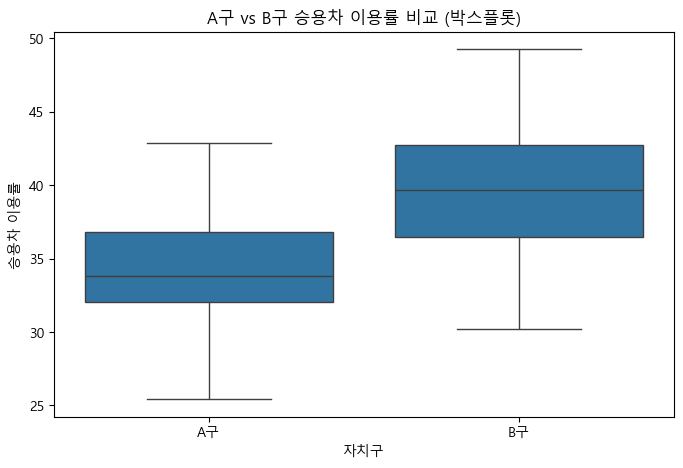

In [4]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

# 랜덤 시드 설정
np.random.seed(42)

# A구와 B구의 승용차 이용률 데이터 생성 (평균은 다르지만 분산이 동일)
a_district = np.random.normal(loc=35, scale=5, size=30)  # A구 (평균 35%, 표준편차 5%)
b_district = np.random.normal(loc=40, scale=5, size=30)  # B구 (평균 40%, 표준편차 5%) → 동일한 분산(표준편차 5) 사용

# 데이터프레임 생성
df = pd.DataFrame({'승용차 이용률': np.concatenate([a_district, b_district]),
                   '자치구': ['A구'] * 30 + ['B구'] * 30})
# 표준편차 계산
std_a = np.std(a_district, ddof=1)
std_b = np.std(b_district, ddof=1)

# 표준편차 출력
print(f"A구 표준편차: {std_a:.2f}")
print(f"B구 표준편차: {std_b:.2f}")

# 데이터 시각화 (박스플롯)
plt.figure(figsize=(8, 5))
sns.boxplot(x='자치구', y='승용차 이용률', data=df)
plt.title("A구 vs B구 승용차 이용률 비교 (박스플롯)")
plt.show()


In [ ]:
# 정규성 검정 (Shapiro-Wilk Test)
shapiro_a = stats.shapiro(a_district)
shapiro_b = stats.shapiro(b_district)
print(f"Shapiro-Wilk test (A구): p-value = {shapiro_a.pvalue:.4f}")
print(f"Shapiro-Wilk test (B구): p-value = {shapiro_b.pvalue:.4f}")

# 등분산 검정 (Levene’s Test)
levene_test = stats.levene(a_district, b_district)
print(f"Levene’s test: p-value = {levene_test.pvalue:.4f}")

# 등분산성 해석만 (t-검정은 추후 다룰 예정)
if levene_test.pvalue > 0.05:
    print("두 집단은 등분산을 만족합니다.")
else:
    print("두 집단은 등분산을 만족하지 않습니다. (이분산)")



Shapiro-Wilk test (A구): p-value = 0.6868
Shapiro-Wilk test (B구): p-value = 0.9130
Levene’s test: p-value = 0.6223
등분산을 가정한 독립표본 t-검정 수행
t-통계량 = -4.5129, p-value = 0.0000
